In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [16]:
plt.rcParams["figure.figsize"] = (8, 6)

In [4]:
games = pd.read_csv('https://downloader.disk.yandex.ru/disk/d7c26c10592ceaadb5d9d74af0149082f1dfceb61f832aff4a525bb61bc60309/6172aae7/_Es8VZKUcDX9pScl2Gn8MEJ-C95V1lSlBC89x2lmmxPgYMv3BPxj2Ms1MxShXF1_qRVZongbsNnAQMzQWFDc2Q%3D%3D?uid=0&filename=games.csv&disposition=attachment&hash=OOk/bCcAgq7XXu57sf%2BoJDen3XgfqA%2B3cu7r6LZarXlzmG5xtv6DIlYpP4eO54e1q/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fcsv&owner_uid=125175473&fsize=1355781&hid=3070df7fcd458f92148a035399c25367&media_type=spreadsheet&tknv=v2')

In [7]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# rows and cols count
games.shape

(16598, 11)

In [9]:
# column dtypes
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [21]:
# Year column to integer
games.Year = games.Year.astype(int)

In [10]:
# any missing values?
games.isnull().values.any()

True

**Which column has the most missing values?**

In [11]:
# missing values in columns
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
# drop missing values
games = games.dropna()

**Print the descriptive stats of the Year variable and plot the distribution of the number of games released by year.**

In [23]:
# descriptive stats of the Year variable
games["Year"].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

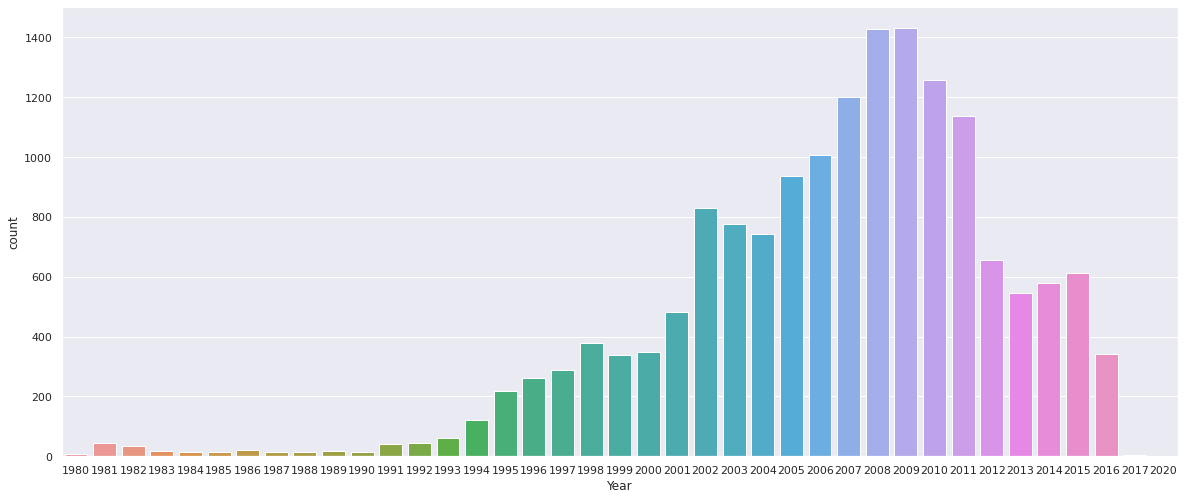

In [28]:
# distribution plot of the number of released games by year
sns.countplot(x=games.Year)
sns.set(rc={'figure.figsize':(25,10)})

In [29]:
# mode of Year
scipy.stats.mode(games["Year"])

ModeResult(mode=array([2009]), count=array([1431]))

In [30]:
# median of Year
np.median(games["Year"])

2007.0

**What platforms have the most releases happened on?
Leave platforms with a frequency of more than 7%.**

In [31]:
platforms = games["Platform"].value_counts(normalize=True).mul(100).to_frame('pct')

In [32]:
platforms.query('pct > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

**Which Publisher games are most frequently featured in the dataset?**

In [68]:
games["Publisher"].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Inti Creates                       1
Warp                               1
The Learning Company               1
Stainless Games                    1
Graphsim Entertainment             1
Name: Publisher, Length: 576, dtype: int64

In [ ]:
# Electronic Arts - 1339

**Let's focus on Nintendo games.     
Calculate the average, median and standard deviation of game sales for this publisher in different regions (NA, EU, JP, Other).    
Which region has the highest median sales?**

In [40]:
nintendo = games.query('Publisher == "Nintendo"')

In [41]:
nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg({'mean', 'median', 'std'})

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
median,0.375000,0.120000,0.280000,0.030000


In [ ]:
# NA (North America)

**Now let's look at Nintendo sales in Japan by genre. Build a boxplot where:**
* Genre is on x-axis
* Sales in Japan are on y-axis

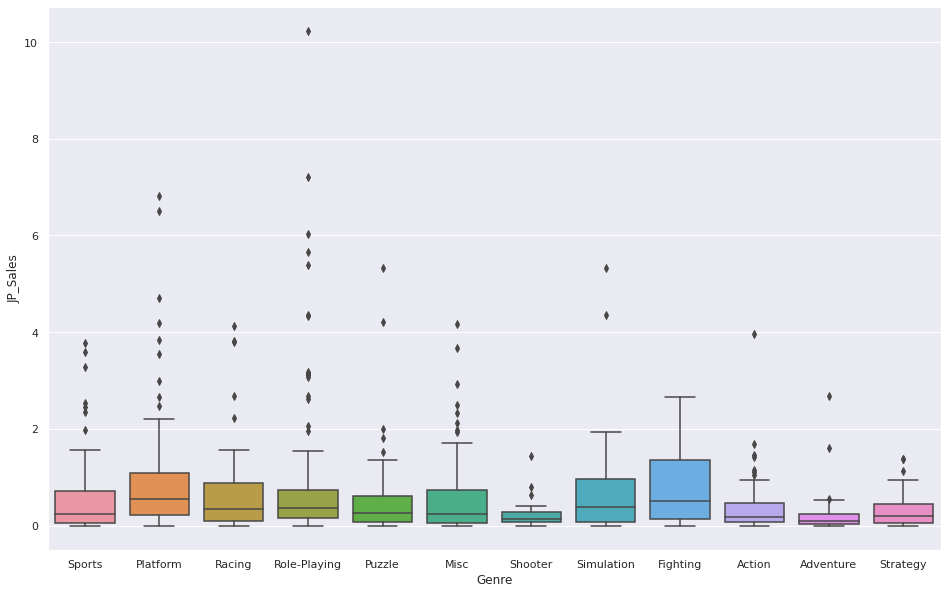

In [55]:
sns.boxplot(data=nintendo, x='Genre', y='JP_Sales')
sns.set(rc={'figure.figsize':(16,10)})

In [ ]:
# The greatest interquartile range is observed in games of the Fighting genre.

**Visualize the dynamics of global sales by year for Nintendo games of the following genres: Fighting, Simulation, Platform, Racing, Sports.**

In [66]:
df = nintendo.query('Genre in ["Fighting", "Simulation", "Platform", "Racing", "Sports"]')\
    .groupby(['Genre', 'Year']).Global_Sales.sum().reset_index()
df

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


**In what time span the most copies of the Sports genre been sold?**

In [ ]:
# 2005 – 2010

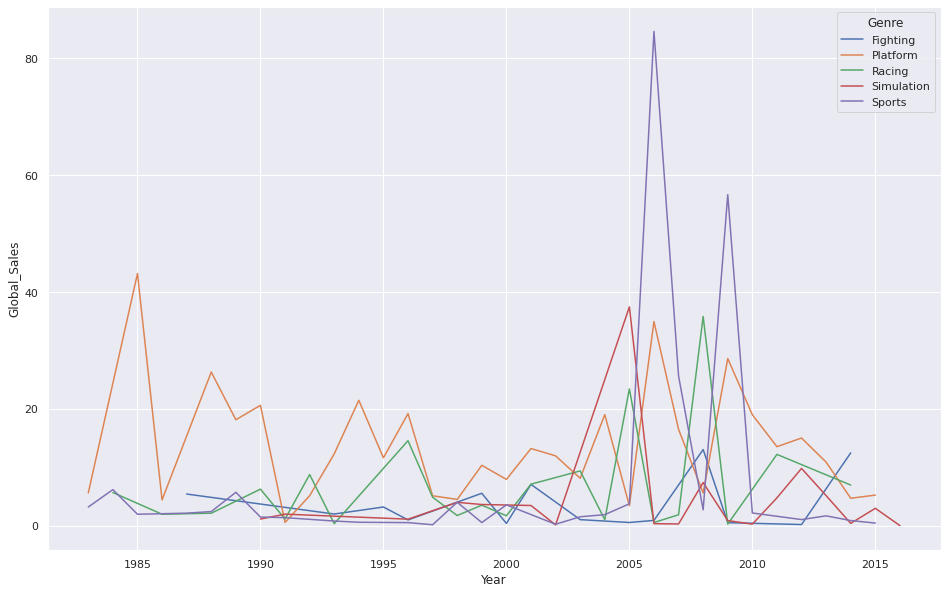

In [67]:
sns.lineplot(data=df, x='Year', y="Global_Sales", hue="Genre")